# GLM-Infused SweetNet Experiments

Experimenting with a modified version of SweetNet that allows it to take pre-trained embeddings as input. To get there I need a way to take the embeddings I’ve gotten from roman and transform them into nice inputs for the model, and a way to set the initial features using these inputs. 


## Importing and exploring the GLM Embedding data

In [44]:
# quick thing to load a pickle file

import pickle
import os # To check if file exists

pickle_file_path = 'glm_embeddings_1.pkl'

# --- Load the Pickle File ---
if os.path.exists(pickle_file_path):
    print(f"Loading embeddings from: {pickle_file_path}")
    try:
        # Open the file in binary read mode ('rb')
        with open(pickle_file_path, 'rb') as file_handle:
            # Load the object(s) from the pickle file
            loaded_embeddings = pickle.load(file_handle)

        print("Embeddings loaded successfully!")        

    except Exception as e:
        print(f"An error occurred while loading the pickle file: {e}")
else:
    print(f"Error: File not found at '{pickle_file_path}'. Please check the filename and path.")

Loading embeddings from: glm_embeddings_1.pkl
Embeddings loaded successfully!


In [6]:
# lets do some quick exploration

# --- Explore the loaded data ---
print(f"Type of loaded object: {type(loaded_embeddings)}")

# Common formats for embeddings: dictionary or numpy array
if isinstance(loaded_embeddings, dict):
    print(f"Number of items (if dictionary): {len(loaded_embeddings)}")
    # print some keys to see what they look like
    print(f"Example keys (first 5): {list(loaded_embeddings.keys())[:5]}")
elif hasattr(loaded_embeddings, 'shape'):
    print(f"Shape (if array/tensor): {loaded_embeddings.shape}")
    if hasattr(loaded_embeddings, 'dtype'):
         print(f"Data type (if array/tensor): {loaded_embeddings.dtype}")

Type of loaded object: <class 'dict'>
Number of items (if dictionary): 2565
Example keys (first 5): ['!GlcNAc', '-10', '-12', '-2', '-4']


In [7]:
print(list(loaded_embeddings.keys())[5:30]) # Print more keys

['-6', '-8', '0dHex', '1,4-Anhydro-Gal-ol', '1,5-Anhydro-D-AltNAc-ol', '1,5-Anhydro-D-FucN-ol', '1,5-Anhydro-D-Rha4NAc-ol', '1,5-Anhydro-Gal-ol', '1,5-Anhydro-GalNAc-ol', '1,5-Anhydro-Glc-ol', '1,5-Anhydro-Glc-onic', '1,5-Anhydro-GlcN2S-ol', '1,5-Anhydro-GlcN2S6S-ol', '1,5-Anhydro-GlcNAc-ol', '1,5-Anhydro-GlcNAc-onic', '1,5-Anhydro-Man-ol', '1,5-Anhydro-ManNAc-ol', '1,5-Anhydro-Xyl-ol', '1,5-Anhydro-Xyl2F-ol', '1-1', '1-2', '1-3', '1-4', '1-5', '1-6']


In [9]:
example_key = '!GlcNAc' 
if example_key in loaded_embeddings:
    embedding_vector = loaded_embeddings[example_key]
    print(f"Type of value for '{example_key}': {type(embedding_vector)}")
    if hasattr(embedding_vector, 'shape'):
        print(f"Shape of value: {embedding_vector.shape}") # This gives dimensionality!
        print(f"Dtype of value: {embedding_vector.dtype}")
    print(embedding_vector) # Print the vector itself if it's not too long
else:
    print(f"Key '{example_key}' not found.")

Type of value for '!GlcNAc': <class 'numpy.ndarray'>
Shape of value: (320,)
Dtype of value: float32
[ 9.33886290e-01 -7.57189512e-01 -5.22765040e-01  4.93726492e-01
  3.03156078e-01 -1.72754931e+00  2.03015614e+00 -1.13539708e+00
 -8.32044244e-01 -6.09763384e-01 -5.63947335e-02 -2.68140852e-01
 -6.37493312e-01  1.45667583e-01 -7.75620103e-01 -1.39048725e-01
  1.06042847e-01 -3.74972522e-01  7.91566074e-01 -1.03034627e+00
 -1.12639211e-01 -3.78986076e-03  5.92547238e-01  2.81559825e-01
 -5.21002829e-01  9.35327411e-01  2.56601274e-01 -3.91364455e-01
  2.72188634e-02  5.00928342e-01 -5.55309415e-01  1.28289807e+00
 -6.45282388e-01  5.19899249e-01  6.10100806e-01  1.84122849e+00
  3.11432898e-01 -7.64928609e-02 -1.05589128e+00  6.50653005e-01
  9.70111132e-01  7.40227938e-01  8.39829683e-01 -3.04328918e-01
 -1.06630003e+00  4.53770608e-01  4.27673876e-01 -6.02427721e-01
  4.39536482e-01 -1.16493046e+00 -2.04154789e-01  1.13036299e+00
  2.51586974e-01  1.04393315e+00  2.60879964e-01  4.638

In [10]:
# let's look at the keys a bit more closely

import collections

key_types = collections.defaultdict(int)
for key in loaded_embeddings.keys():
    if '-' in key and not any(char.isalpha() for char in key):
        key_types['linkage_or_modification'] += 1
    elif key[0].isalpha():
        key_types['monosaccharide'] += 1
    else:
        key_types['other'] += 1

print(key_types)

defaultdict(<class 'int'>, {'other': 122, 'linkage_or_modification': 36, 'monosaccharide': 2407})


In [ ]:
# Let's explore those Other keys 

other_keys = []
for key in loaded_embeddings.keys():
    if '-' in key and not any(char.isalpha() for char in key):
        pass # linkage_or_modification
    elif key[0].isalpha():
        pass # monosaccharide
    else:
        other_keys.append(key)

print(f"Number of 'other' keys: {len(other_keys)}")
print(f"Examples of 'other' keys: {other_keys[:20]}") # Print the first 20

Number of 'other' keys: 122
Examples of 'other' keys: ['!GlcNAc', '0dHex', '1,4-Anhydro-Gal-ol', '1,5-Anhydro-D-AltNAc-ol', '1,5-Anhydro-D-FucN-ol', '1,5-Anhydro-D-Rha4NAc-ol', '1,5-Anhydro-Gal-ol', '1,5-Anhydro-GalNAc-ol', '1,5-Anhydro-Glc-ol', '1,5-Anhydro-Glc-onic', '1,5-Anhydro-GlcN2S-ol', '1,5-Anhydro-GlcN2S6S-ol', '1,5-Anhydro-GlcNAc-ol', '1,5-Anhydro-GlcNAc-onic', '1,5-Anhydro-Man-ol', '1,5-Anhydro-ManNAc-ol', '1,5-Anhydro-Xyl-ol', '1,5-Anhydro-Xyl2F-ol', '1b-4', '1dAlt-ol']


In [13]:
# Let's look at 50 more keys

print(f"More Examples of 'other' keys: {other_keys[20:70]}")

More Examples of 'other' keys: ['1dEry-ol', '2,3-Anhydro-All', '2,3-Anhydro-Man', '2,3-Anhydro-Rib', '2,5-Anhydro-D-Alt-ol', '2,5-Anhydro-D-Alt3S-ol', '2,5-Anhydro-D-Tal', '2,5-Anhydro-Glc', '2,5-Anhydro-L-Man-ol', '2,5-Anhydro-Man', '2,5-Anhydro-Man-ol', '2,5-Anhydro-Man1S-ol', '2,5-Anhydro-Man3S-ol', '2,5-Anhydro-Man6S', '2,5-Anhydro-Tal-ol', '2,5-Anhydro-Tal6P', '2,6-Anhydro-Glc5NAc-ol', '2,6-Anhydro-L-Gul-ol', '2,6-Anhydro-L-Gul-onic', '2,6-Anhydro-Man-ol', '2,6-Anhydro-Tal5NAc-ol', '2,7-Anhydro-Kdo', '2,7-Anhydro-Kdof', '2dAraHexA', '3,6-Anhydro-Fruf', '3,6-Anhydro-Gal', '3,6-Anhydro-Gal2S', '3,6-Anhydro-Glc', '3,6-Anhydro-L-Gal', '3,6-Anhydro-L-Gal2Me', '3-Anhydro-Gal', '3-Anhydro-Gal2S', '3dFuc', '3dGal', '3dLyxHep-ulosaric', '4,7-Anhydro-Kdo', '4,7-Anhydro-KdoOPEtN', '4,8-Anhydro-Kdo', '4d8dNeu5Ac', '4dAraHex', '4dEry-ol', '4dFuc', '4dGal', '4dNeu5Ac', '4dThrHexNAcA4en', '4eLeg5Ac7Ac', '5dAraf', '5dAraf3Me', '5dLyxf3CFo', '5dLyxf3CMe']


In [20]:
# Let's explore those monosaccharide keys
monosaccharide = []
for key in loaded_embeddings.keys():
    if '-' in key and not any(char.isalpha() for char in key):
        pass # linkage_or_modification
    elif key[0].isalpha():
        monosaccharide.append(key)
    else:
        pass # other

print(f"Number of 'monosaccharide' keys: {len(monosaccharide)}")
print(f"Examples of 'monosaccharide' keys: {monosaccharide[:50]}") # Print the first 50

Number of 'monosaccharide' keys: 2407
Examples of 'monosaccharide' keys: ['Abe', 'Abe1PP', 'Abe2Ac', 'AbeOAc', 'Acarbose', 'AcefA', 'Aci5Ac7Ac', 'AcoNAc', 'All', 'All-ol', 'All1S2S3S4S', 'All2Ac3Ac', 'All2S3S4S', 'All3Ac', 'All6Ac', 'AllN', 'AllN1P', 'AllNAc', 'AllNAc6Me', 'AllOMe', 'Alt', 'AltA', 'AltA2N', 'AltA2S', 'AltAN', 'AltNAc', 'AltNAcA', 'AltNAcA1Prop', 'Altf', 'AltfOAc', 'Amikacin', 'Api', 'ApiOAc', 'ApiOMe-ol', 'Apif', 'Ara', 'Ara-ol', 'Ara1Cer2Ac', 'Ara1Me', 'Ara1N4P', 'Ara1P4N', 'Ara1PP', 'Ara1PP2NAc', 'Ara1PP4N', 'Ara1PP4NFo', 'Ara2Ac', 'Ara2Ac3Ac', 'Ara2Ac3Ac4Ac', 'Ara2Ac4Ac', 'Ara2Ac5P-ol']


In [21]:
# To be throughough, let's look at 50 Linkage or Modification keys as well
linkage_or_modification = []
for key in loaded_embeddings.keys():
    if '-' in key and not any(char.isalpha() for char in key):
        linkage_or_modification.append(key)
    elif key[0].isalpha():
        pass # monosaccharide
    else:
        pass # other

print(f"Number of 'linkage_or_modification' keys: {len(linkage_or_modification)}")
print(f"Examples of 'linkage_or_modification' keys: {linkage_or_modification[:50]}") # Print the first 50

Number of 'linkage_or_modification' keys: 36
Examples of 'linkage_or_modification' keys: ['-10', '-12', '-2', '-4', '-6', '-8', '1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-?', '2-3', '2-4', '2-5', '2-6', '3-1', '3-5', '4-1', '4-5', '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '6-1', '6-3', '6-4', '?1-2', '?1-3', '?1-4', '?1-6', '?1-?', '?2-?']


### Load the glycowork library

I'll load the glycowork library and compare it to the keys in the embedding file

In [22]:
from glycowork.glycan_data import loader

glycowork_vocabulary = loader.lib

print(f"Number of items in glycowork vocabulary: {len(glycowork_vocabulary)}")
print(f"Example keys from glycowork vocabulary (first 20): {list(glycowork_vocabulary.keys())[:20]}")

Number of items in glycowork vocabulary: 2565
Example keys from glycowork vocabulary (first 20): ['!GlcNAc', '-10', '-12', '-2', '-4', '-6', '-8', '0dHex', '1,4-Anhydro-Gal-ol', '1,5-Anhydro-D-AltNAc-ol', '1,5-Anhydro-D-FucN-ol', '1,5-Anhydro-D-Rha4NAc-ol', '1,5-Anhydro-Gal-ol', '1,5-Anhydro-GalNAc-ol', '1,5-Anhydro-Glc-ol', '1,5-Anhydro-Glc-onic', '1,5-Anhydro-GlcN2S-ol', '1,5-Anhydro-GlcN2S6S-ol', '1,5-Anhydro-GlcNAc-ol', '1,5-Anhydro-GlcNAc-onic']


Nice, they seem to correspond one to one!

That saves me a lot of work down the line (Thanks Roman)

In [26]:
# let's look at one of the keys in the glycowork vocabulary to see what they return
example_glycowork_key = '-10'
if example_glycowork_key in glycowork_vocabulary:
    glycowork_value = glycowork_vocabulary[example_glycowork_key]
    print(f"Type of value for '{example_glycowork_key}': {type(glycowork_value)}")
    print(glycowork_value)   

Type of value for '-10': <class 'int'>
1


### Filter and Transform Data

In [ ]:
#Loads the GIFFLAR dataset for the Taxonomy Kingdom (takes a long time to run(~40m), just use the file it generated)

import sys
sys.path.append('../GIFFLAR') 

from gifflar.benchmarks import get_dataset
import pathlib

data_config_kingdom = {"name": "Taxonomy_Kingdom"}
root_dir = pathlib.Path("./data_gifflar")  # Choose a directory to save the data
root_dir.mkdir(exist_ok=True, parents=True)

kingdom_dataset_config = get_dataset(data_config_kingdom, root_dir)


In [ ]:
# Print the dataset configuration
print(kingdom_dataset_config)



{'name': 'Taxonomy_Kingdom', 'filepath': WindowsPath('data_gifflar/taxonomy_Kingdom.tsv')}


In [3]:
# Lets load the dataset into a pandas dataframe
import pandas as pd

filepath = 'data_gifflar/taxonomy_Kingdom.tsv'
#filepath = kingdom_dataset_config['filepath'] #If you've loaded it recently, which you shouldn't

# Load the dataset into a pandas DataFrame
multilabel_kingdom_df = pd.read_csv(filepath, sep="\t")
# Display the first few rows of the DataFrame
print(multilabel_kingdom_df.head())
# Display the shape of the DataFrame
print(f"Shape of the DataFrame: {multilabel_kingdom_df.shape}")

                                               IUPAC  Amoebozoa  Animalia  \
0  3,6-Anhydro-L-Gal(a1-3)Gal(b1-4)3,6-Anhydro-L-...          0         0   
1  3,6-Anhydro-L-Gal(a1-3)Gal(b1-4)3,6-Anhydro-L-...          0         0   
2  3,6-Anhydro-L-Gal(a1-3)Gal(b1-4)3,6-Anhydro-L-...          0         0   
3  3,6-Anhydro-L-Gal(a1-3)Gal(b1-4)3,6-Anhydro-L-...          0         0   
4  3,6-Anhydro-L-Gal(a1-3)GalOMe(b1-4)3,6-Anhydro...          0         0   

   Bacteria  Bamfordvirae  Chromista  Euryarchaeota  Excavata  Fungi  \
0         1             0          0              0         0      0   
1         1             0          0              0         0      0   
2         1             0          0              0         0      0   
3         1             0          0              0         0      0   
4         1             0          0              0         0      0   

   Heunggongvirae  Metazoa  Orthornavirae  Pararnavirae  Plantae  Protista  \
0               0        0

That looks fine

Let's convert them into graphs

In [5]:
print(multilabel_kingdom_df.columns)

Index(['IUPAC', 'Amoebozoa', 'Animalia', 'Bacteria', 'Bamfordvirae',
       'Chromista', 'Euryarchaeota', 'Excavata', 'Fungi', 'Heunggongvirae',
       'Metazoa', 'Orthornavirae', 'Pararnavirae', 'Plantae', 'Protista',
       'Riboviria', 'split'],
      dtype='object')


In [4]:

# Let's try the prepare multilabel function from the train_test_split module

from glycowork.ml.train_test_split import prepare_multilabel

# Prepare the multilabel dataset using the melt function
# The melt function is used to transform the DataFrame from wide format to long format
kingdom_df_melted = multilabel_kingdom_df.melt(
    id_vars=['IUPAC', 'split'],
    value_vars=['Amoebozoa', 'Animalia', 'Bacteria', 'Bamfordvirae', 'Chromista', 'Euryarchaeota', 'Excavata', 'Fungi', 'Heunggongvirae', 'Metazoa', 'Orthornavirae', 'Pararnavirae', 'Plantae', 'Protista', 'Riboviria'],
    var_name='Kingdom',
    value_name='Association'
)

# Filter for associations where the glycan belongs to the kingdom (Association == 1)
kingdom_df_melted = kingdom_df_melted[kingdom_df_melted['Association'] == 1]

# Splitting the dataset using the 'split' column
train_melted_df = kingdom_df_melted[kingdom_df_melted['split'] == 'train'].drop(columns=['split'])
val_melted_df = kingdom_df_melted[kingdom_df_melted['split'] == 'val'].drop(columns=['split'])
test_melted_df = kingdom_df_melted[kingdom_df_melted['split'] == 'test'].drop(columns=['split'])

# Finally using the prepare_multilabel function to prepare the data for training
glycan_train, label_train = prepare_multilabel(train_melted_df, rank='Kingdom', glycan_col='IUPAC')
glycan_val, label_val = prepare_multilabel(val_melted_df, rank='Kingdom', glycan_col='IUPAC')
glycan_test, label_test = prepare_multilabel(test_melted_df, rank='Kingdom', glycan_col='IUPAC')



In [5]:
# Let's validate the split

import pandas as pd
import numpy as np

# 1. Load the original DataFrame
multilabel_kingdom_df_original = pd.read_csv(filepath, sep="\t")
kingdom_cols = ['Amoebozoa', 'Animalia', 'Bacteria', 'Bamfordvirae', 'Chromista', 'Euryarchaeota', 'Excavata', 'Fungi', 'Heunggongvirae', 'Metazoa', 'Orthornavirae', 'Pararnavirae', 'Plantae', 'Protista', 'Riboviria']

# 2. Split the original DataFrame by 'split'
train_df = multilabel_kingdom_df_original[multilabel_kingdom_df_original['split'] == 'train']
val_df = multilabel_kingdom_df_original[multilabel_kingdom_df_original['split'] == 'val']
test_df = multilabel_kingdom_df_original[multilabel_kingdom_df_original['split'] == 'test']

# 3. Extract glycans and labels directly
glycan_train_list = train_df['IUPAC'].tolist()
label_train_list = [train_df[kingdom].values.tolist() for kingdom in kingdom_cols]
label_train_list = list(zip(*label_train_list)) # Transpose

glycan_val_list = val_df['IUPAC'].tolist()
label_val_list = [val_df[kingdom].values.tolist() for kingdom in kingdom_cols]
label_val_list = list(zip(*label_val_list)) # Transpose

glycan_test_list = test_df['IUPAC'].tolist()
label_test_list = [test_df[kingdom].values.tolist() for kingdom in kingdom_cols]
label_test_list = list(zip(*label_test_list)) # Transpose

print(f"Number of training glycans: {len(glycan_train_list)}")
print(f"Number of validation glycans: {len(glycan_val_list)}")
print(f"Number of test glycans: {len(glycan_test_list)}")
print(f"Shape of training labels: {len(label_train_list)} x {len(label_train_list[0]) if label_train_list else 0}")
print(f"Shape of validation labels: {len(label_val_list)} x {len(label_val_list[0]) if label_val_list else 0}")
print(f"Shape of test labels: {len(label_test_list)} x {len(label_test_list[0]) if label_test_list else 0}")

# Now re-run the checking function (modified for this new label extraction)
def check_example_direct(glycan_list, label_list, split_name, original_df, kingdom_cols):
    if glycan_list:
        example_index = 0
        example_glycan = glycan_list[example_index]
        example_labels_split = list(label_list[example_index])

        original_row = original_df[original_df['IUPAC'] == example_glycan].iloc[0]
        labels_original = np.array([original_row[col] for col in kingdom_cols], dtype=np.float32).tolist()

        print(f"--- Checking example from {split_name} set (Direct) ---")
        print(f"Glycan: {example_glycan}")
        print(f"Split in original data: {original_row['split']}")
        print(f"Labels in split data: {example_labels_split}")
        print(f"Labels in original data: {labels_original}")
        if labels_original == example_labels_split:
            print("Labels match!")
        else:
            print("Labels DO NOT match!")
    else:
        print(f"{split_name} set is empty.")

check_example_direct(glycan_train_list, label_train_list, 'train', multilabel_kingdom_df_original, kingdom_cols)
check_example_direct(glycan_val_list, label_val_list, 'val', multilabel_kingdom_df_original, kingdom_cols)
check_example_direct(glycan_test_list, label_test_list, 'test', multilabel_kingdom_df_original, kingdom_cols)

Number of training glycans: 11593
Number of validation glycans: 3213
Number of test glycans: 1646
Shape of training labels: 11593 x 15
Shape of validation labels: 3213 x 15
Shape of test labels: 1646 x 15
--- Checking example from train set (Direct) ---
Glycan: 3,6-Anhydro-L-Gal(a1-3)Gal(b1-4)3,6-Anhydro-L-Gal(a1-3)Gal
Split in original data: train
Labels in split data: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Labels in original data: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Labels match!
--- Checking example from val set (Direct) ---
Glycan: 3,6-Anhydro-L-Gal(a1-3)Gal(b1-4)3,6-Anhydro-L-Gal(a1-3)GalOMe(b1-4)3,6-Anhydro-L-Gal(a1-3)Gal
Split in original data: val
Labels in split data: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Labels in original data: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Labels match!
--- Checking example from test set (Direct) ---
Glycan: 3,6-Anhydro-L-Gal(a1-3)GalOMe(b1-4)3,6-Anhydro-L-G

In [6]:
# Lets make them into graphs again, but hyper efficiently this time

from glycowork.ml.processing import split_data_to_train

multilabel_kingdom_loaders = split_data_to_train(
    glycan_list_train=glycan_train,
    glycan_list_val=glycan_val,
    labels_train=label_train,
    labels_val=label_val,
    batch_size=32,  # Adjust as needed
    drop_last=False,
    augment_prob=0.0,  # Adjust if you want augmentation for training
    generalization_prob=0.0  # Adjust if you want generalization for training
)


In [16]:
print(multilabel_kingdom_loader)

{'train': <torch_geometric.loader.dataloader.DataLoader object at 0x000001CC68AF07D0>, 'val': <torch_geometric.loader.dataloader.DataLoader object at 0x000001CC7180AD10>}


Batch: DataBatch(edge_index=[2, 402], labels=[434], string_labels=[32], y=[480], num_nodes=434, x=[434, 320], batch=[434], ptr=[33])
Number of graphs in batch: 32

First graph data: Data(edge_index=[2, 14], labels=[15], string_labels=[15], y=[15], x=[15, 320], num_nodes=15)
Node features (x): tensor([[ 0.9339, -0.7572, -0.5228,  ...,  1.8300,  0.1645,  1.2676],
        [ 0.9339, -0.7572, -0.5228,  ...,  1.8300,  0.1645,  1.2676],
        [ 0.9339, -0.7572, -0.5228,  ...,  1.8300,  0.1645,  1.2676],
        ...,
        [ 0.9339, -0.7572, -0.5228,  ...,  1.8300,  0.1645,  1.2676],
        [ 0.9339, -0.7572, -0.5228,  ...,  1.8300,  0.1645,  1.2676],
        [ 0.9339, -0.7572, -0.5228,  ...,  1.8300,  0.1645,  1.2676]])
Edge indices (edge_index): tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]])
Labels (y): tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
String labels: ['Rha', 'a1-3', 'Rha', 'a1-3', 

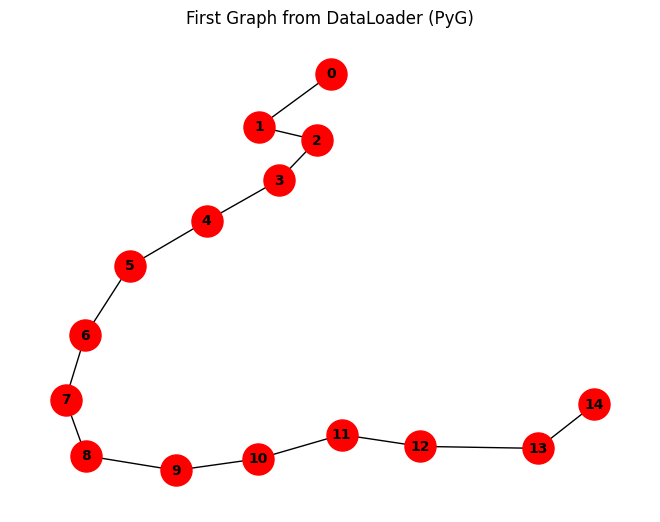

In [12]:
# Check one of the graphs in the dataloader

import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

# Assuming your DataLoader is called 'multilabel_kingdom_loader'
inspected_loader = multilabel_kingdom_loaders_emb['train'] # Access the train DataLoader

# Get the first batch of data
try:
    batch = next(iter(inspected_loader))
    print("Batch:", batch)
    print("Number of graphs in batch:", batch.num_graphs)

    # Extract the first graph from the batch
    first_graph_data = batch[2] #change to check other graphs
    print("\nFirst graph data:", first_graph_data)
    print("Node features (x):", first_graph_data.x)
    print("Edge indices (edge_index):", first_graph_data.edge_index)
    print("Labels (y):", first_graph_data.y)
    print("String labels:", first_graph_data.string_labels)

    # Convert the PyG Data object to a NetworkX graph for visualization
    nx_graph = to_networkx(first_graph_data) 

    # Visualize the NetworkX graph
    nx_graph = to_networkx(first_graph_data)
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos, with_labels=True, node_size=500, node_color="red", font_size=10, font_weight="bold", arrows=False)
    plt.title("First Graph from DataLoader (PyG)")
    plt.show()

except StopIteration:
    print("The DataLoader is empty.")
except Exception as e:
    print(f"An error occurred: {e}")

## Let's make a function to add embeddings to a dataloader object

In [8]:
# Let's load the embeddings again here, so I don't have to jump up and down whenever I reload the kernel)

import pickle
import os # To check if file exists

pickle_file_path = 'glm_embeddings_1.pkl'

# --- Load the Pickle File ---
if os.path.exists(pickle_file_path):
    print(f"Loading embeddings from: {pickle_file_path}")
    try:
        # Open the file in binary read mode ('rb')
        with open(pickle_file_path, 'rb') as file_handle:
            # Load the object(s) from the pickle file
            glm_embeddings = pickle.load(file_handle)

        print("Embeddings loaded successfully!")        

    except Exception as e:
        print(f"An error occurred while loading the pickle file: {e}")
else:
    print(f"Error: File not found at '{pickle_file_path}'. Please check the filename and path.")

Loading embeddings from: glm_embeddings_1.pkl
Embeddings loaded successfully!


In [22]:
# Function to add GLM embeddings to a dictionary of dataloaders before loading them into the model

import torch
from torch_geometric.loader import DataLoader

def add_glm_embeddings_to_dataloaders(dataloaders, glm_embeddings):
    embedded_loaders = {}
    embedding_dim = 320
    for split, loader in dataloaders.items():
        embedded_data_list = []
        for batch in loader:
            for graph in batch.to_data_list():
                node_embeddings = []
                if hasattr(graph, 'string_labels'):
                    for label in graph.string_labels:
                        if label in glm_embeddings:
                            node_embeddings.append(torch.tensor(glm_embeddings[label]))
                        else:
                            node_embeddings.append(torch.zeros(embedding_dim))
                    graph.x = torch.stack(node_embeddings).float()
                    print(f"Shape of graph.x after adding embeddings: {graph.x.shape}")
                embedded_data_list.append(graph)

        embedded_loaders[split] = DataLoader(embedded_data_list, batch_size=32)
        print(f"GLM embeddings added to {split} DataLoader.")
    return embedded_loaders

In [24]:
# testing the fucntion

multilabel_kingdom_loaders_emb = add_glm_embeddings_to_dataloaders(multilabel_kingdom_loaders, glm_embeddings)

Shape of graph.x after adding embeddings: torch.Size([13, 320])
Shape of graph.x after adding embeddings: torch.Size([9, 320])
Shape of graph.x after adding embeddings: torch.Size([3, 320])
Shape of graph.x after adding embeddings: torch.Size([23, 320])
Shape of graph.x after adding embeddings: torch.Size([5, 320])
Shape of graph.x after adding embeddings: torch.Size([5, 320])
Shape of graph.x after adding embeddings: torch.Size([11, 320])
Shape of graph.x after adding embeddings: torch.Size([17, 320])
Shape of graph.x after adding embeddings: torch.Size([29, 320])
Shape of graph.x after adding embeddings: torch.Size([3, 320])
Shape of graph.x after adding embeddings: torch.Size([31, 320])
Shape of graph.x after adding embeddings: torch.Size([33, 320])
Shape of graph.x after adding embeddings: torch.Size([5, 320])
Shape of graph.x after adding embeddings: torch.Size([5, 320])
Shape of graph.x after adding embeddings: torch.Size([17, 320])
Shape of graph.x after adding embeddings: torch

In [ ]:
L

## SweetNet copy from models.py for experimentation

In [15]:
# SweetNet class

from typing import Dict, Optional, Tuple, Union, Literal

import numpy as np
try:
    import torch
    import torch.nn.functional as F
    from torch_geometric.nn import GraphConv
    from torch_geometric.nn import global_mean_pool as gap
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
except ImportError:
  raise ImportError("<torch or torch_geometric missing; did you do 'pip install glycowork[ml]'?>")
from glycowork.glycan_data.loader import lib, download_model 

class SweetNet(torch.nn.Module):
    def __init__(self, lib_size: int, # number of unique tokens for graph nodes
                 num_classes: int = 1, # number of output classes (>1 for multilabel)
                 hidden_dim: int = 128 # dimension of hidden layers
                ) -> None:
        "given glycan graphs as input, predicts properties via a graph neural network"
        #print("Using SweetNet from notebook cell!") # Check to see if I am running this in the notebook
        super(SweetNet, self).__init__()
        # Convolution operations on the graph
        self.conv1 = GraphConv(hidden_dim, hidden_dim)
        self.conv2 = GraphConv(hidden_dim, hidden_dim)
        self.conv3 = GraphConv(hidden_dim, hidden_dim)

        # Node embedding # commented out since I will be using the embeddings from the GLM model
        #self.item_embedding = torch.nn.Embedding(num_embeddings=lib_size+1, embedding_dim=hidden_dim)

        # Fully connected part
        self.lin1 = torch.nn.Linear(hidden_dim, 1024)
        self.lin2 = torch.nn.Linear(1024, 128)
        self.lin3 = torch.nn.Linear(128, num_classes)
        self.bn1 = torch.nn.BatchNorm1d(1024)
        self.bn2 = torch.nn.BatchNorm1d(128)
        self.act1 = torch.nn.LeakyReLU()
        self.act2 = torch.nn.LeakyReLU()

    def forward(self, x: torch.Tensor, edge_index: torch.Tensor, batch: torch.Tensor,
                inference: bool = False) -> Union[torch.Tensor, Tuple[torch.Tensor, torch.Tensor]]:
        
        
        # Graph convolution operations (now using GLM embeddings as x)
        x = F.leaky_relu(self.conv1(x, edge_index))
        x = F.leaky_relu(self.conv2(x, edge_index))
        x = F.leaky_relu(self.conv3(x, edge_index))
        x = gap(x, batch)

        # Fully connected part
        x = self.act1(self.bn1(self.lin1(x)))
        x_out = self.bn2(self.lin2(x))
        x = F.dropout(self.act2(x_out), p = 0.5, training = self.training)

        x = self.lin3(x).squeeze(1)

        if inference:
          return x, x_out
        else:
          return x



### Other functions I might modify

In [20]:
# Init_weights function

def init_weights(model: torch.nn.Module, # neural network for analyzing glycans
                mode: str = 'sparse', # initialization algorithm: 'sparse', 'kaiming', 'xavier'
                sparsity: float = 0.1 # proportion of sparsity after initialization
               ) -> None:
    "initializes linear layers of PyTorch model with a weight initialization"
    #print("Using init_weights from notebook cell!") # Check to see if I am running this in the notebook
    if isinstance(model, torch.nn.Linear):
        if mode == 'sparse':
            torch.nn.init.sparse_(model.weight, sparsity = sparsity)
        elif mode == 'kaiming':
            torch.nn.init.kaiming_uniform_(model.weight)
        elif mode == 'xavier':
            torch.nn.init.xavier_uniform_(model.weight)
        else:
            print("This initialization option is not supported.")

In [19]:
# prep_model function

def prep_model(model_type: Literal["SweetNet", "LectinOracle", "LectinOracle_flex", "NSequonPred"], # type of model to create
              num_classes: int, # number of unique classes for classification
              libr: Optional[Dict[str, int]] = None, # dictionary of form glycoletter:index
              trained: bool = False, # whether to use pretrained model
              # set hidden_dim to 320 rather than 128 for the pretrained model
              # but 128 is the default for the model in the paper
              hidden_dim: int = 320 # hidden dimension for the model (SweetNet/LectinOracle only)
             ) -> torch.nn.Module: # initialized PyTorch model
    "wrapper to instantiate model, initialize it, and put it on the GPU"
    #print("Using prep_model from notebook cell!") # Check to see if I am running this in the notebook
    if libr is None:
      libr = lib
    if model_type == 'SweetNet':
      model = SweetNet(len(libr), num_classes = num_classes, hidden_dim = hidden_dim)
      model = model.apply(lambda module: init_weights(module, mode = 'sparse'))
      if trained:
        if hidden_dim != 128:
          raise ValueError("Hidden dimension must be 128 for pretrained model")
        model_path = download_model("glycowork_sweetnet_species.pt")
        model.load_state_dict(torch.load(model_path, map_location = device, weights_only = True))
      model = model.to(device)
    elif model_type == 'LectinOracle':
      model = LectinOracle(len(libr), num_classes = num_classes, input_size_prot = int(10*hidden_dim))
      model = model.apply(lambda module: init_weights(module, mode = 'xavier'))
      if trained:
        model_path = download_model("glycowork_lectinoracle.pt")
        model.load_state_dict(torch.load(model_path, map_location = device, weights_only = True))
      model = model.to(device)
    elif model_type == 'LectinOracle_flex':
      model = LectinOracle_flex(len(libr), num_classes = num_classes)
      model = model.apply(lambda module: init_weights(module, mode = 'xavier'))
      if trained:
        model_path = download_model("glycowork_lectinoracle_flex.pt")
        model.load_state_dict(torch.load(model_path, map_location = device, weights_only = True))
      model = model.to(device)
    elif model_type == 'NSequonPred':
      model = NSequonPred()
      model = model.apply(lambda module: init_weights(module, mode = 'xavier'))
      if trained:
        model_path = download_model("NSequonPred_batch32.pt")
        model.load_state_dict(torch.load(model_path, map_location = device, weights_only = True))
      model = model.to(device)
    else:
      print("Invalid Model Type")
    return model
    

## Testing using same framework as iteration 0 (basic kingdom sweetnet)

In [34]:

# testing the modified SweetNet model on the GlycoWork dataset 
from glycowork.glycan_data.loader import df_species
from glycowork.ml.train_test_split import hierarchy_filter
from glycowork.ml.processing import split_data_to_train
from glycowork.ml import model_training

# silence the avalanche of "undefined" warnings
#import warnings
#from sklearn.exceptions import UndefinedMetricWarning
#warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

train_x, val_x, train_y, val_y, id_val, class_list, class_converter = hierarchy_filter(df_species,
                                                                                       rank = 'Kingdom')

dataloaders = split_data_to_train(train_x, val_x, train_y, val_y)




KeyboardInterrupt: 

Epoch 0/99
----------
train Loss: 1.9001 Accuracy: 0.7017 MCC: 0.5287
val Loss: 1.4064 Accuracy: 0.8170 MCC: 0.7249
Validation loss decreased (0.000000 --> 1.406380).  Saving model ...

Epoch 1/99
----------
train Loss: 1.3831 Accuracy: 0.8341 MCC: 0.7494
val Loss: 1.2541 Accuracy: 0.8587 MCC: 0.7869
Validation loss decreased (1.406380 --> 1.254090).  Saving model ...

Epoch 2/99
----------
train Loss: 1.2960 Accuracy: 0.8563 MCC: 0.7832
val Loss: 1.2171 Accuracy: 0.8708 MCC: 0.8046
Validation loss decreased (1.254090 --> 1.217080).  Saving model ...

Epoch 3/99
----------
train Loss: 1.2512 Accuracy: 0.8642 MCC: 0.7944
val Loss: 1.1815 Accuracy: 0.8736 MCC: 0.8092
Validation loss decreased (1.217080 --> 1.181533).  Saving model ...

Epoch 4/99
----------
train Loss: 1.2130 Accuracy: 0.8734 MCC: 0.8087
val Loss: 1.1646 Accuracy: 0.8783 MCC: 0.8168
Validation loss decreased (1.181533 --> 1.164561).  Saving model ...

Epoch 5/99
----------
train Loss: 1.1877 Accuracy: 0.8783 MCC: 0.8163


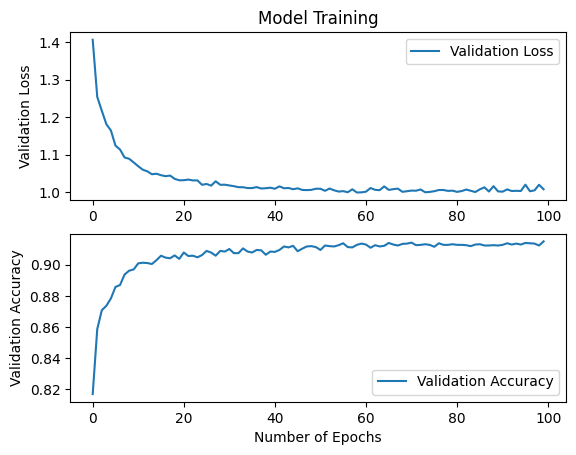

In [8]:
# Lets split out the training code so I don't have to load the data each time

model = prep_model('SweetNet', len(class_list))
optimizer_ft, scheduler, criterion = model_training.training_setup(model, 0.0005, num_classes = len(class_list))
model_ft = model_training.train_model(model, dataloaders, criterion, optimizer_ft, scheduler,
                   num_epochs = 100, mode = 'classification',)

### Extra stuff

In [99]:
# Let's look at the distribution of the Kingdoms in the original data

import pandas as pd

kingdom_counts = df_species['Kingdom'].value_counts()
print("Kingdom distribution in the original data:")
print(kingdom_counts)

Kingdom distribution in the original data:
Kingdom
Animalia            21979
Bacteria             9058
Plantae              3799
Fungi                3422
Excavata              513
Riboviria             281
Pararnavirae          120
Orthornavirae          97
Chromista              86
Euryarchaeota          62
Bamfordvirae           60
Protista               60
Metazoa                53
Amoebozoa              19
Shotokuvirae           13
Proteoarchaeota        11
Heunggongvirae         11
Virus                   4
Trapavirae              1
Crenarchaeota           1
Heterokontophyta        1
Name: count, dtype: int64


In [100]:
import pandas as pd

# Print the first few rows to get an overview
print(df_species.head())

# Print the data types of the columns
print(df_species.info())

# Check for duplicated glycans
print(f"Number of unique glycans: {df_species['glycan'].nunique()}")
print(f"Total number of rows: {len(df_species)}")

# If you suspect a column contains multiple kingdoms:
if 'Kingdom' in df_species.columns:  # Replace 'Kingdom' with the actual column name
    # Check the first few values of that column
    print(df_species['Kingdom'].head())
    # If it's a string with delimiters, count the delimiters
    if isinstance(df_species['Kingdom'][0], str) and ',' in df_species['Kingdom'][0]: #assuming ',' is the delimiter
        print(f"Example value: {df_species['Kingdom'][0]}")
        print(f"Number of commas in the first value: {df_species['Kingdom'][0].count(',')}")

    # Check for multiple columns representing kingdoms
    for col in df_species.columns:
        if col in ['Animalia', 'Bacteria', 'Plantae']:  # Add all possible kingdom column names
            print(f"Column '{col}': Data type = {df_species[col].dtype}, Unique values = {df_species[col].unique()}")

                                              glycan                 Species  \
0  Gal(a1-2)[Rha3Me(a1-3)][Xyl(b1-4)]Fuc(a1-3)[Xy...                  ATCV-1   
1  Gal(a1-2)[Rha3Me(a1-3)][Xyl(b1-4)]Fuc(a1-3)[Xy...                  ATCV-1   
2  Gal(a1-2)[Rha3Me(a1-3)][Xyl4Me(b1-4)]Fuc(a1-3)...                  ATCV-1   
3  Gal(a1-2)[Rha3Me(a1-3)][Xyl4Me(b1-4)]Fuc(a1-3)...                  ATCV-1   
4                            GalA(a1-2)Rha(a1-4)GalA  Abelmoschus_esculentus   

         Genus           Family        Order          Class  \
0  Chlorovirus  Phycodnaviridae  Algavirales  Megaviricetes   
1  Chlorovirus  Phycodnaviridae  Algavirales  Megaviricetes   
2  Chlorovirus  Phycodnaviridae  Algavirales  Megaviricetes   
3  Chlorovirus  Phycodnaviridae  Algavirales  Megaviricetes   
4  Abelmoschus        Malvaceae     Malvales   Dicotyledons   

               Phylum       Kingdom   Domain  \
0  Nucleocytoviricota  Bamfordvirae    Virus   
1  Nucleocytoviricota  Bamfordvirae    Virus

In [101]:
seen = set()
duplicates_count = 0

for item in train_x:
    if item in seen:
        duplicates_count += 1
    else:
        seen.add(item)

print(f"Number of duplicates: {duplicates_count}")
print(f"Number of unique items: {len(seen)}")

NameError: name 'train_x' is not defined

## Time to train a multi-class multi-label Sweetnet on our properly loaded data 

In [21]:
from glycowork.glycan_data.loader import df_species
from glycowork.ml.train_test_split import hierarchy_filter
from glycowork.ml.processing import split_data_to_train
from glycowork.ml import model_training

from glycowork.ml import model_training
classes = 15 # 15 kingdoms in the dataset, should read that from the data instead
dataloaders = multilabel_kingdom_loaders
model = prep_model('SweetNet', classes) 
optimizer_ft, scheduler, criterion = model_training.training_setup(model, 0.0005, num_classes = classes)
model_ft = model_training.train_model(model, dataloaders, criterion, optimizer_ft, scheduler,
                   num_epochs = 100, mode = 'multilabel',)

Epoch 0/99
----------


AttributeError: 'NoneType' object has no attribute 'to'

In [26]:
# Lets Try with my new glm-infused data

classes = 15 # 15 kingdoms in the dataset, should read that from the data instead
dataloaders = multilabel_kingdom_loaders_emb
model = prep_model('SweetNet', classes) 
optimizer_ft, scheduler, criterion = model_training.training_setup(model, 0.0005, num_classes = classes)
model_ft = model_training.train_model(model, dataloaders, criterion, optimizer_ft, scheduler,
                   num_epochs = 100, mode = 'multilabel',use_external_embeddings = True)


TypeError: train_model() got an unexpected keyword argument 'use_external_embeddings'